# Split 7:3

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [70]:
# Load data from CSV file
df = pd.read_csv('SGT.csv')
# Convert Close time column to date format
df["time"] = pd.to_datetime(df["time"], format="%m/%d/%Y")
# Sort data by Close time column
df = df.sort_values("time")
df = df[['close','time']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,close,time
0,3960,2019-03-01
1,3720,2019-03-04
2,3930,2019-03-05
3,3930,2019-03-06
4,3860,2019-03-07
...,...,...
1317,14800,2024-06-07
1318,14600,2024-06-10
1319,14050,2024-06-11
1320,14200,2024-06-12


In [71]:
# 2. Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [72]:
from pandas.core.indexers.utils import Any
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)


In [73]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

In [74]:
# 6. Tạo tập 30 ngày tiếp theo
df['time'] = pd.to_datetime(df['time'])
last_index = df['time'].index[-1]
last_date = df['time'].iloc[-1]
date_range = pd.date_range(last_date, periods=31, freq='D')

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[30122.54096787 30145.59908024 30168.65719262 30191.715305
 30214.77341737 30237.83152975 30260.88964212 30283.9477545
 30307.00586688 30330.06397925 30353.12209163 30376.180204
 30399.23831638 30422.29642876 30445.35454113 30468.41265351
 30491.47076589 30514.52887826 30537.58699064 30560.64510301
 30583.70321539 30606.76132777 30629.81944014 30652.87755252
 30675.9356649  30698.99377727 30722.05188965 30745.11000202
 30768.1681144  30791.22622678]


In [75]:
from sklearn.metrics import mean_squared_log_error
def calculate_mape(actual, predicted):
    ape = np.abs((actual - predicted) / actual)
    mape = np.mean(ape) * 100
    return mape

#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)


Testing RMSE: 13192.425738648402
Testing MAE: 12909.367033211864
Testing MSLE: 0.5134361426059302
Testing MAPE: 104.01964118151157


Testing RMSE: 13192.425738648402
Testing MAE: 12909.367033211864
Testing MSLE: 0.5134361426059302
Testing MAPE: 104.01964118151157


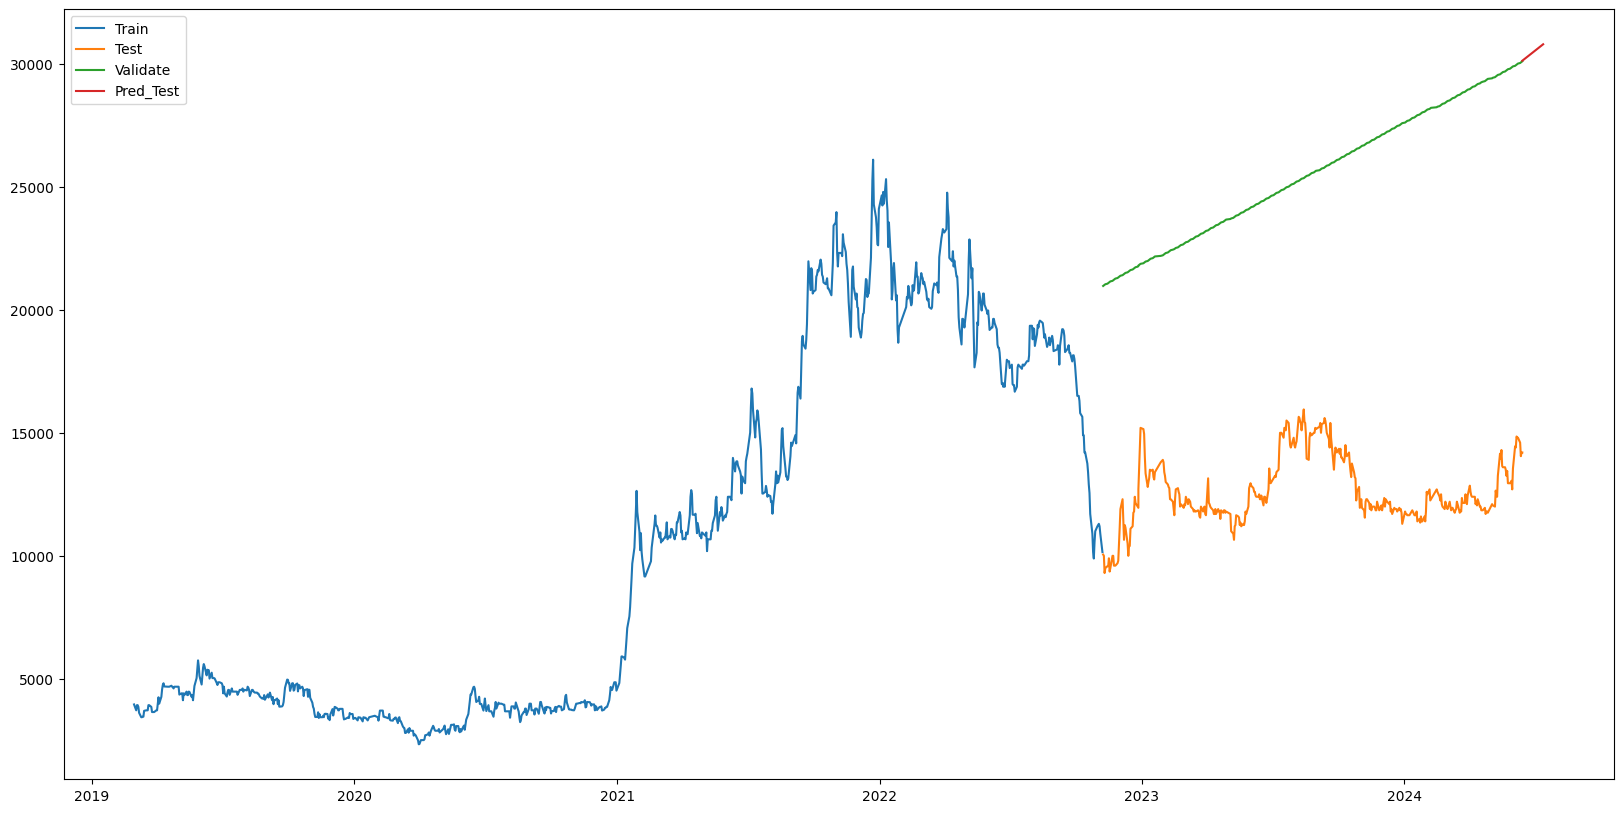

In [76]:
#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)

date_range = date_range[:-1]  # Cắt bớt phần tử cuối cùng của date_range

plt.subplots(figsize=(20,10))
plt.plot(train_data['time'], train_data['close'])
plt.plot(test_data['time'], test_data['close'])
plt.plot(test_data['time'], y_pred)
plt.plot(date_range, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Pred_Test', 'Next30Day'])
plt.show()

In [77]:
test_data.index

RangeIndex(start=925, stop=1322, step=1)

# Split 8:2

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [79]:
# Load data from CSV file
df = pd.read_csv('SGT.csv')
# Convert Close time column to date format
df["time"] = pd.to_datetime(df["time"], format="%m/%d/%Y")
# Sort data by Close time column
df = df.sort_values("time")
df = df[['close','time']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,close,time
0,3960,2019-03-01
1,3720,2019-03-04
2,3930,2019-03-05
3,3930,2019-03-06
4,3860,2019-03-07
...,...,...
1317,14800,2024-06-07
1318,14600,2024-06-10
1319,14050,2024-06-11
1320,14200,2024-06-12


In [80]:
# 2. Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [81]:
from pandas.core.indexers.utils import Any
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)


In [82]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

In [83]:
# 6. Tạo tập 30 ngày tiếp theo
df['time'] = pd.to_datetime(df['time'])
last_index = df['time'].index[-1]
last_date = df['time'].iloc[-1]
date_range = pd.date_range(last_date, periods=31, freq='D')

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[23527.50445373 23543.92989169 23560.35532964 23576.7807676
 23593.20620555 23609.63164351 23626.05708147 23642.48251942
 23658.90795738 23675.33339533 23691.75883329 23708.18427124
 23724.6097092  23741.03514715 23757.46058511 23773.88602306
 23790.31146102 23806.73689898 23823.16233693 23839.58777489
 23856.01321284 23872.4386508  23888.86408875 23905.28952671
 23921.71496466 23938.14040262 23954.56584057 23970.99127853
 23987.41671648 24003.84215444]


In [84]:
from sklearn.metrics import mean_squared_log_error
def calculate_mape(actual, predicted):
    ape = np.abs((actual - predicted) / actual)
    mape = np.mean(ape) * 100
    return mape

#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)


Testing RMSE: 8583.25805349014
Testing MAE: 8327.072149057443
Testing MSLE: 0.2638280055274934
Testing MAPE: 65.76693136262469


Testing RMSE: 8583.25805349014
Testing MAE: 8327.072149057443
Testing MSLE: 0.2638280055274934
Testing MAPE: 65.76693136262469


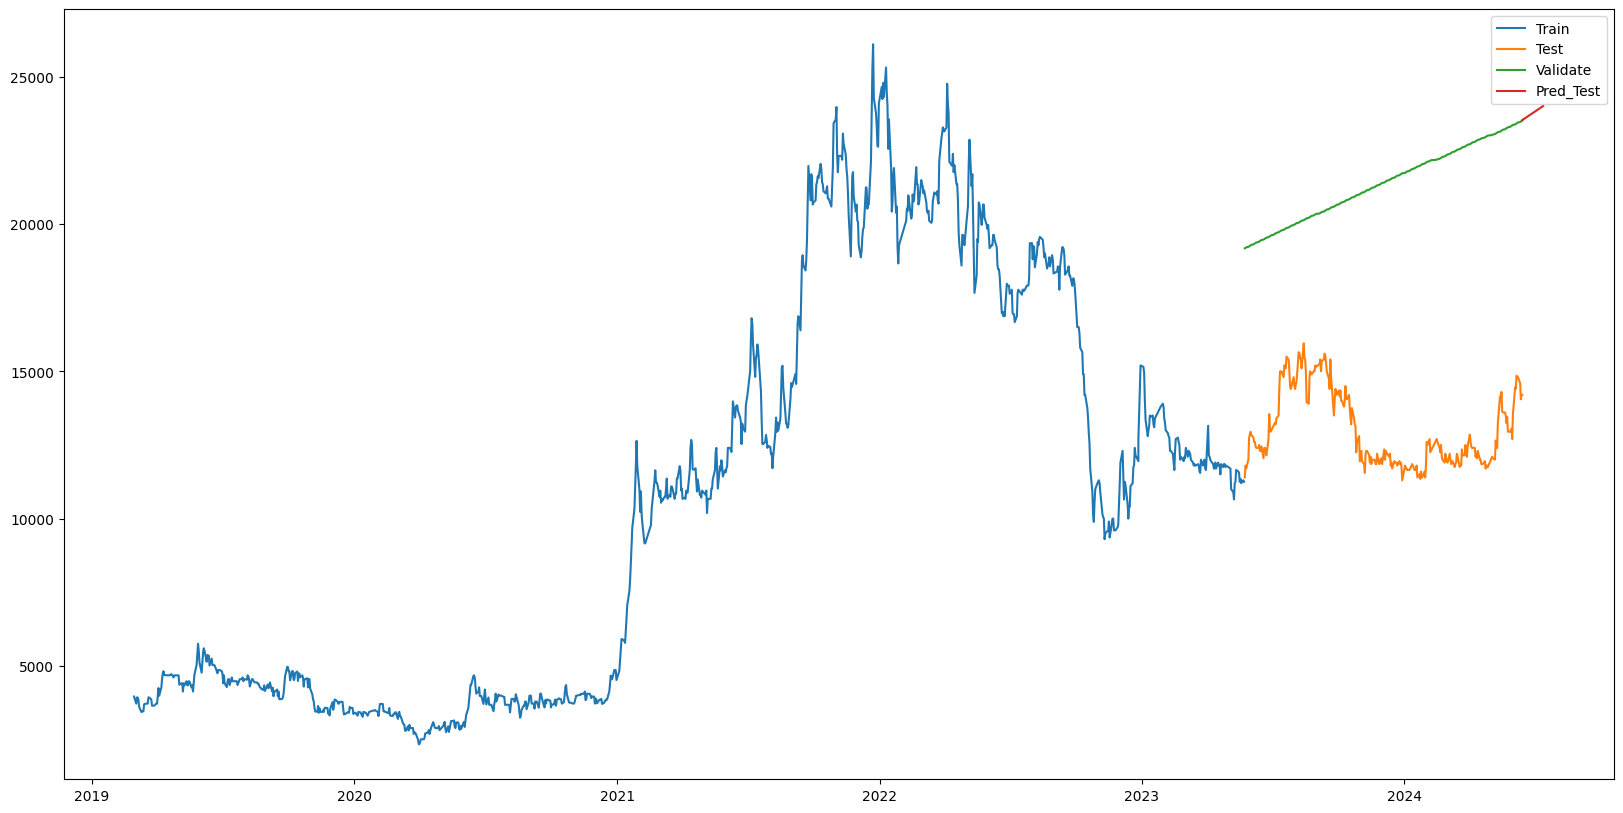

In [85]:
#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)

date_range = date_range[:-1]  # Cắt bớt phần tử cuối cùng của date_range

plt.subplots(figsize=(20,10))
plt.plot(train_data['time'], train_data['close'])
plt.plot(test_data['time'], test_data['close'])
plt.plot(test_data['time'], y_pred)
plt.plot(date_range, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Pred_Test', 'Next30Day'])
plt.show()

In [86]:
test_data.index

RangeIndex(start=1057, stop=1322, step=1)

# Split 9:1

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [88]:
# Load data from CSV file
df = pd.read_csv('SGT.csv')
# Convert Close time column to date format
df["time"] = pd.to_datetime(df["time"], format="%m/%d/%Y")
# Sort data by Close time column
df = df.sort_values("time")
df = df[['close','time']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,close,time
0,3960,2019-03-01
1,3720,2019-03-04
2,3930,2019-03-05
3,3930,2019-03-06
4,3860,2019-03-07
...,...,...
1317,14800,2024-06-07
1318,14600,2024-06-10
1319,14050,2024-06-11
1320,14200,2024-06-12


In [89]:
# 2. Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [90]:
from pandas.core.indexers.utils import Any
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)


In [91]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

In [92]:
# 6. Tạo tập 30 ngày tiếp theo
df['time'] = pd.to_datetime(df['time'])
last_index = df['time'].index[-1]
last_date = df['time'].iloc[-1]
date_range = pd.date_range(last_date, periods=31, freq='D')

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[20402.61046821 20415.74374792 20428.87702762 20442.01030733
 20455.14358703 20468.27686674 20481.41014644 20494.54342615
 20507.67670585 20520.80998556 20533.94326526 20547.07654497
 20560.20982467 20573.34310438 20586.47638409 20599.60966379
 20612.7429435  20625.8762232  20639.00950291 20652.14278261
 20665.27606232 20678.40934202 20691.54262173 20704.67590143
 20717.80918114 20730.94246084 20744.07574055 20757.20902025
 20770.34229996 20783.47557967]


In [93]:
from sklearn.metrics import mean_squared_log_error
def calculate_mape(actual, predicted):
    ape = np.abs((actual - predicted) / actual)
    mape = np.mean(ape) * 100
    return mape

#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)


Testing RMSE: 7201.855984541289
Testing MAE: 7177.192006148415
Testing MSLE: 0.2139720913098704
Testing MAPE: 58.59306207261813


Testing RMSE: 7201.855984541289
Testing MAE: 7177.192006148415
Testing MSLE: 0.2139720913098704
Testing MAPE: 58.59306207261813


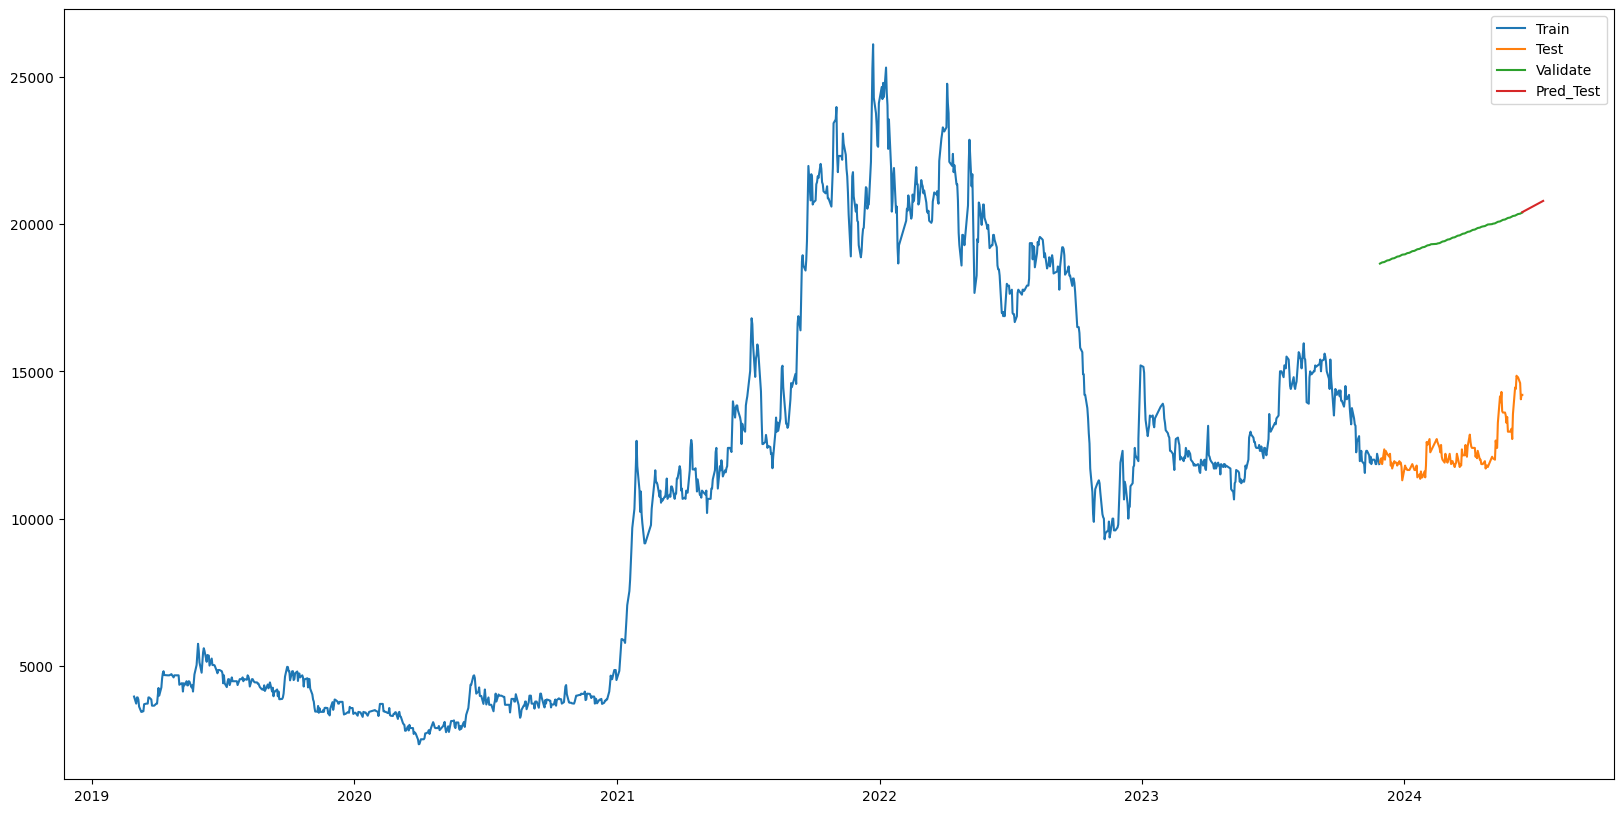

In [94]:
#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)

date_range = date_range[:-1]  # Cắt bớt phần tử cuối cùng của date_range

plt.subplots(figsize=(20,10))
plt.plot(train_data['time'], train_data['close'])
plt.plot(test_data['time'], test_data['close'])
plt.plot(test_data['time'], y_pred)
plt.plot(date_range, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Pred_Test', 'Next30Day'])
plt.show()

In [95]:
test_data.index

RangeIndex(start=1189, stop=1322, step=1)